In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sg


In [2]:
df = pd.read_excel("Problem statement2.xlsx")
df2 = pd.read_excel("Problem statement.xlsx")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33070 entries, 0 to 33069
Data columns (total 4 columns):
Timestamp              33070 non-null datetime64[ns]
Speed                  33070 non-null float64
Cumulative Distance    33070 non-null int64
Fuel Level (mV)        33070 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 1.0 MB


In [3]:
df.head()

,Timestamp,Speed,Cumulative Distance,Fuel Level (mV)
0,2018-01-21 17:14:05,0.1,0,651
1,2018-01-21 17:15:06,3.8,25,646
2,2018-01-21 17:15:20,5.5,41,641
3,2018-01-21 17:15:23,6.2,46,641
4,2018-01-21 17:15:39,15.7,88,641


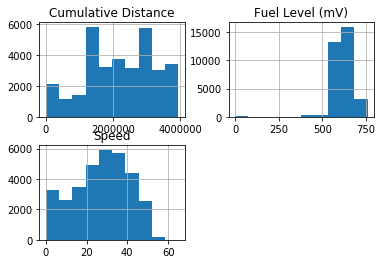

In [4]:
df.hist();

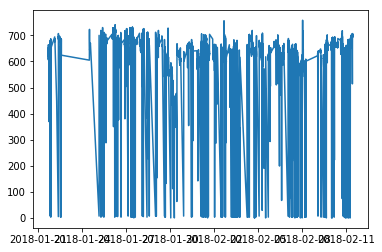

In [5]:
plt.plot(df.Timestamp, df['Fuel Level (mV)']);

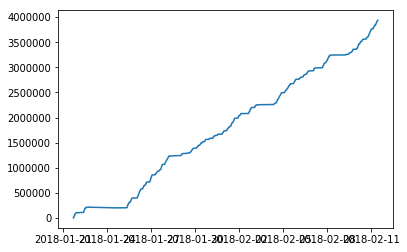

In [6]:
plt.plot(df.Timestamp, df['Cumulative Distance']);

#### Set Fig Size

In [7]:
plt.rcParams['figure.figsize']


[6.0, 4.0]

In [8]:
plt.rcParams['figure.figsize'] = [16,4]

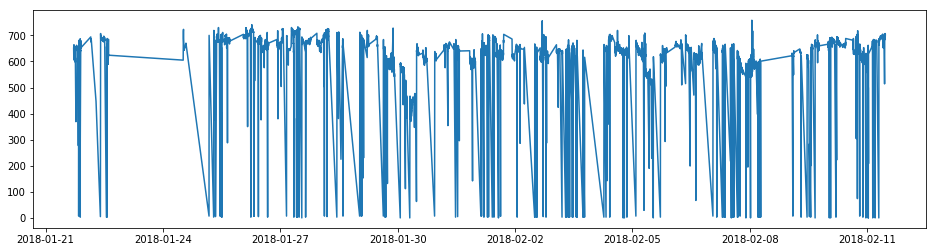

In [9]:
plt.plot(df.Timestamp, df['Fuel Level (mV)']);

## Filter Design

In [10]:
b1 = sg.firwin(40, 0.5)
b2 = sg.firwin(41, [0.3, 0.8])
w1, h1 = sg.freqz(b1)
w2, h2 = sg.freqz(b2)

Text(0.5,0,'Frequency (rad/sample)')

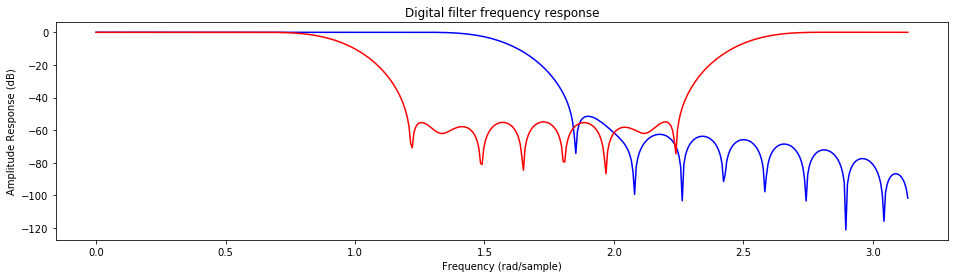

In [11]:
plt.title('Digital filter frequency response')
plt.plot(w1, 20*np.log10(np.abs(h1)), 'b')
plt.plot(w2, 20*np.log10(np.abs(h2)), 'r')
plt.ylabel('Amplitude Response (dB)')
plt.xlabel('Frequency (rad/sample)')

### Spectral Analysis

In [12]:
fs = 10e3
N = 1e5
amp = 2*np.sqrt(2)
freq = 1270.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x1 = amp*np.sin(2*np.pi*freq*time)
x =x1+ np.random.normal(scale=np.sqrt(noise_power), size=time.shape)

In [13]:
f, Pper_spec = sg.periodogram(x1, fs, 'flattop', scaling='spectrum')

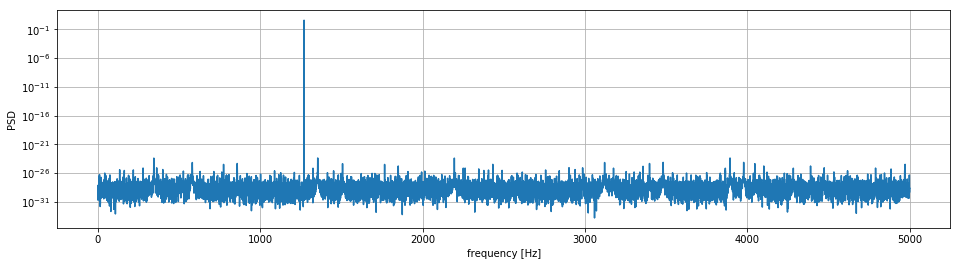

In [14]:
plt.semilogy(f, Pper_spec)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD')
plt.grid()
plt.show()

In [15]:
# Spectral Analysis using Welch’s Method

In [16]:
f, Pwelch_spec = sg.welch(x1, fs, scaling='spectrum')

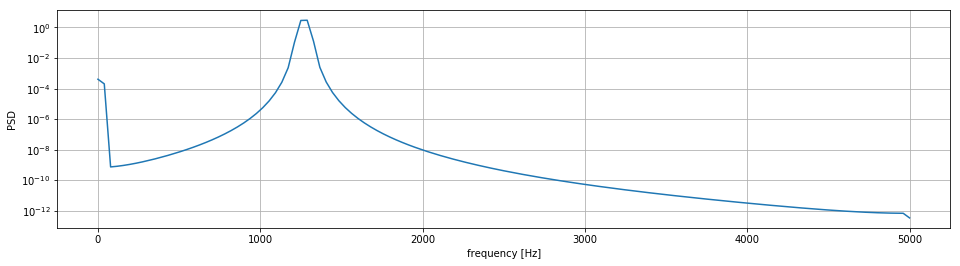

In [17]:
plt.semilogy(f, Pwelch_spec)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD')
plt.grid()
plt.show()

In [18]:
f, Pwelch_spec = sg.welch(df['Fuel Level (mV)'], fs, scaling='spectrum')

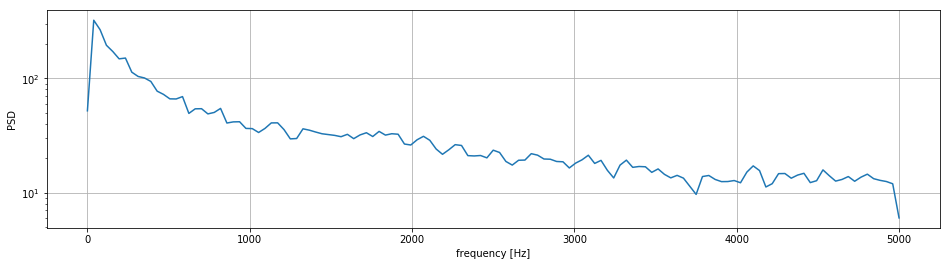

In [19]:
plt.semilogy(f, Pwelch_spec)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD')
plt.grid()
plt.show()

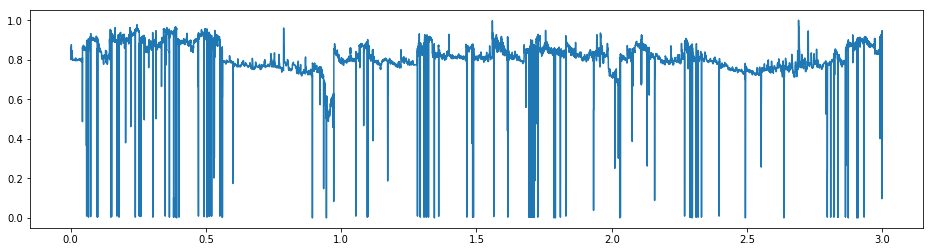

In [20]:
plt.plot(time[:30000], df['Fuel Level (mV)'][:30000]/df['Fuel Level (mV)'].max());

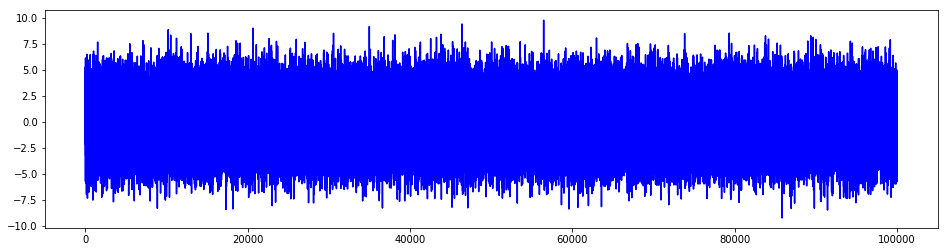

In [21]:
# First, design the Buterworth filter
N  = 3    # Filter order
Wn = 0.6    # Cutoff frequency
B, A = sg.butter(N, Wn, output='ba')
smooth_data = sg.filtfilt(B,A, x)
plt.plot(smooth_data,'b-');

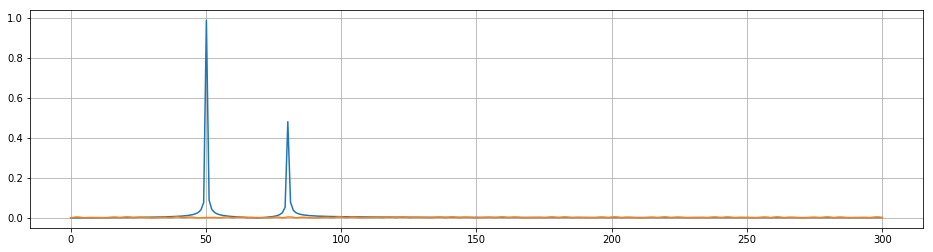

In [22]:
from scipy.fftpack import fft
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 600.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
#import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.plot(xf, 2.0/N * np.abs(y[0:N//2]))
plt.grid()
plt.show()

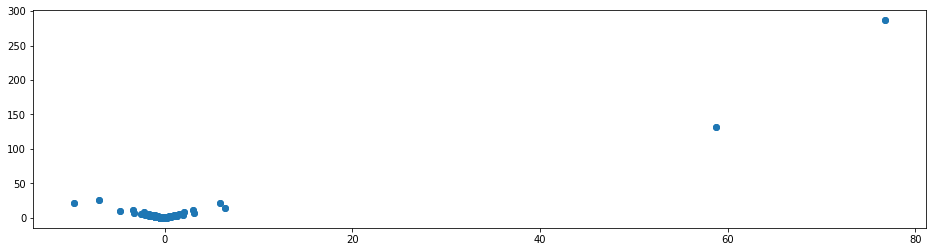

In [23]:
yf, 
plt.scatter(yf.real,abs(yf.imag))

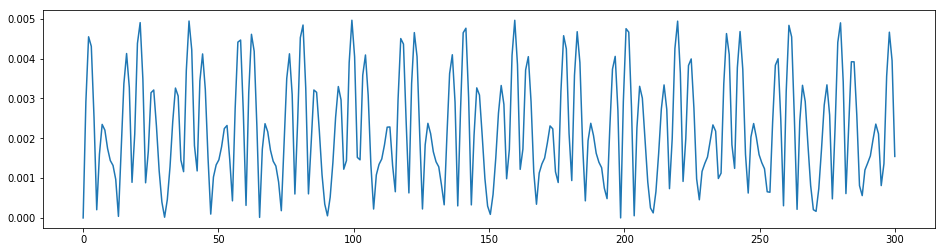

In [24]:
plt.plot(xf, 2.0/N * np.abs(y[0:N//2]));

In [25]:
yvolt = fft(df['Fuel Level (mV)'/][:100000])
plt.ylim(0,400000);
plt.plot(xf[:100], np.abs(yvolt[0:100]));

SyntaxError: invalid syntax (<ipython-input-25-d9ae79cc4754>, line 1)

In [26]:
plt.hist(yvolt);
plt.ylim(0,500)

NameError: name 'yvolt' is not defined

In [27]:
yvolt, len(yvolt), 
yvolt.real,
plt.scatter(yvolt.real, abs(yvolt.imag), s = 2),
plt.xlim(-25000, 25000),
plt.ylim(ymax = 40000)

NameError: name 'yvolt' is not defined

In [ ]:
[1]**2